In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [2]:
train = pd.read_csv('../apartment/train.csv')
test = pd.read_csv('../apartment/test.csv')
#train.info()

In [3]:
from sklearn import preprocessing

catagorical_cols=[]
for column in train.columns.values:
    if (train[column].dtype=='O'):
        catagorical_cols.append(column)


for x in catagorical_cols:
    train[x]=train[x].fillna('None')
    
for x in catagorical_cols:
    label = preprocessing.LabelEncoder()
    train[x] = label.fit_transform(train[x])

In [4]:
from sklearn import preprocessing

catagorical_cols1=[]
for column in test.columns.values:
    if (test[column].dtype=='O'):
        catagorical_cols1.append(column)


for x in catagorical_cols1:
    test[x]=test[x].fillna('None')
    
for x in catagorical_cols1:
    label = preprocessing.LabelEncoder()
    test[x] = label.fit_transform(test[x])

In [5]:
train['CarPerArea']=train['GarageArea']/train['GarageCars']
train['CarPerArea']=train['CarPerArea'].fillna(train['CarPerArea'].mean())
train['basementAnd1stFloorArea'] = train['1stFlrSF']+train['TotalBsmtSF']

test['CarPerArea']=test['GarageArea']/test['GarageCars']
test['CarPerArea']=test['CarPerArea'].fillna(test['CarPerArea'].mean())
test['basementAnd1stFloorArea'] = test['1stFlrSF']+test['TotalBsmtSF']

In [6]:
train = train.drop('GarageArea',1)
train = train.drop('GarageCars',1)
train = train.drop('1stFlrSF',1)
train = train.drop('TotalBsmtSF',1)

test = test.drop('GarageArea',1)
test = test.drop('GarageCars',1)
test = test.drop('1stFlrSF',1)
test = test.drop('TotalBsmtSF',1)

In [7]:
from sklearn import preprocessing
from sklearn import linear_model, svm, gaussian_process
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model.stochastic_gradient import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Lasso
import numpy as np

In [8]:
#8 features
#cols =['OverallQual','GrLivArea','CarPerArea','basementAnd1stFloorArea','FullBath','YearBuilt','TotRmsAbvGrd','YearRemodAdd']
#X = train[cols].values.astype(np.float64)
#y = train['SalePrice'].values.astype(np.float64)
#X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [9]:
#train = pd.read_csv('../apartment/train.csv')
#train1 = train.values

In [10]:
for x in train.columns.values:
    if(train[x].isnull().sum() >0):
        train[x] = train[x].fillna(train[x].mean())

In [11]:
for x in test.columns.values:
    if(test[x].isnull().sum() >0):
        test[x] = test[x].fillna(test[x].mean())

In [12]:
cols = train.columns.difference(['Id','SalePrice'])
cols1 = test.columns.difference(['Id','SalePrice'])

In [13]:
X = train[cols].values.astype(np.float64)
y = train['SalePrice'].values.astype(np.float64)
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [14]:
minmaxscaler = preprocessing.MinMaxScaler(copy=True, feature_range=(0, 1)).fit(X)
X_train = minmaxscaler.fit_transform(X_train)

X_test = minmaxscaler.transform(X_test)

In [86]:
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(solver='lbfgs', activation = 'relu',hidden_layer_sizes=(70,65,60,55,50,45,40,35,30,25,20,15,10,5), max_iter=500, learning_rate='adaptive', batch_size=32)
clf.fit(X_train, y_train.ravel())
y_pred = clf.predict(X_test)
print( " score:" + str(np.sqrt(np.mean((np.log(y_pred)-np.log(y_test))*(np.log(y_pred)-np.log(y_test))))))

 score:0.138892803634


In [58]:
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Dense,Activation

In [16]:
# 17 layers
model = Sequential()
model.add(Dense(units=77,input_dim=77,kernel_initializer ='normal',activation='relu'))
model.add(Dense(units = 70,activation='relu',kernel_initializer = 'normal'))
model.add(Dense(units = 65,activation='relu',kernel_initializer = 'normal'))
model.add(Dense(units = 60,activation='relu',kernel_initializer = 'normal'))
model.add(Dense(units = 55,activation='relu',kernel_initializer = 'normal'))
model.add(Dense(units = 50,activation='relu',kernel_initializer = 'normal'))
model.add(Dense(units = 45,activation='relu',kernel_initializer = 'normal'))
model.add(Dense(units = 40,activation='relu',kernel_initializer = 'normal'))
model.add(Dense(units = 35,activation='relu',kernel_initializer = 'normal'))
model.add(Dense(units = 30,activation='relu',kernel_initializer = 'normal'))
model.add(Dense(units = 25,activation='relu',kernel_initializer = 'normal'))
model.add(Dense(units = 20,activation='relu',kernel_initializer = 'normal'))
model.add(Dense(units = 15,activation='relu',kernel_initializer = 'normal'))
model.add(Dense(units = 10,activation='relu',kernel_initializer = 'normal'))
model.add(Dense(units = 5,activation='relu',kernel_initializer = 'normal'))
model.add(Dense(units=1,kernel_initializer='normal'))

In [14]:
# 20 layers
model = Sequential()
model.add(Dense(units=77,input_dim=77,kernel_initializer ='normal',activation='relu'))
model.add(Dense(units = 75,activation='relu',kernel_initializer = 'normal'))
model.add(Dense(units = 70,activation='relu',kernel_initializer = 'normal'))
model.add(Dense(units = 65,activation='relu',kernel_initializer = 'normal'))
model.add(Dense(units = 53,activation='relu',kernel_initializer = 'normal'))
model.add(Dense(units = 60,activation='relu',kernel_initializer = 'normal'))
model.add(Dense(units = 55,activation='relu',kernel_initializer = 'normal'))
model.add(Dense(units = 53,activation='relu',kernel_initializer = 'normal'))
model.add(Dense(units = 50,activation='relu',kernel_initializer = 'normal'))
model.add(Dense(units = 45,activation='relu',kernel_initializer = 'normal'))
model.add(Dense(units = 40,activation='relu',kernel_initializer = 'normal'))
model.add(Dense(units = 35,activation='relu',kernel_initializer = 'normal'))
model.add(Dense(units = 33,activation='relu',kernel_initializer = 'normal'))
model.add(Dense(units = 30,activation='relu',kernel_initializer = 'normal'))
model.add(Dense(units = 25,activation='relu',kernel_initializer = 'normal'))
model.add(Dense(units = 20,activation='relu',kernel_initializer = 'normal'))
model.add(Dense(units = 15,activation='relu',kernel_initializer = 'normal'))
model.add(Dense(units = 10,activation='relu',kernel_initializer = 'normal'))
model.add(Dense(units = 5,activation='relu',kernel_initializer = 'normal'))
model.add(Dense(units=1,kernel_initializer='normal'))

In [16]:
# 4 layers
model = Sequential()
model.add(Dense(units=77,input_dim=77,kernel_initializer ='normal',activation='relu'))
model.add(Dense(units = 130,activation='relu',kernel_initializer = 'normal'))
model.add(Dense(units = 190,activation='relu',kernel_initializer = 'normal'))
model.add(Dense(units=1,kernel_initializer='normal'))

In [17]:
#from keras import optimizers
#sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

In [17]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [18]:
model.fit(X_train,y_train,epochs=100,batch_size=5)

Epoch 1/100
1022/1022 [==============================] - 1s 969us/step - loss: 22885016505.4560
Epoch 2/100
1022/1022 [==============================] - 0s 458us/step - loss: 4353648720.8611
Epoch 3/100
1022/1022 [==============================] - 0s 454us/step - loss: 2746272671.2877
Epoch 4/100
1022/1022 [==============================] - 0s 443us/step - loss: 1884593311.7965
Epoch 5/100
1022/1022 [==============================] - 0s 449us/step - loss: 1703650663.2016
Epoch 6/100
1022/1022 [==============================] - 0s 483us/step - loss: 1496318148.3249
Epoch 7/100
1022/1022 [==============================] - 1s 506us/step - loss: 1488086982.0939
Epoch 8/100
1022/1022 [==============================] - 1s 496us/step - loss: 1523875851.0059
Epoch 9/100
1022/1022 [==============================] - 0s 487us/step - loss: 1342540805.9765
Epoch 10/100
1022/1022 [==============================] - 1s 529us/step - loss: 1415708598.4658
Epoch 11/100
1022/1022 [========================

1022/1022 [==============================] - 1s 561us/step - loss: 753110992.2740
Epoch 87/100
1022/1022 [==============================] - 0s 487us/step - loss: 838590420.4892
Epoch 88/100
1022/1022 [==============================] - 1s 491us/step - loss: 933484732.9980
Epoch 89/100
1022/1022 [==============================] - 1s 491us/step - loss: 828903559.6517
Epoch 90/100
1022/1022 [==============================] - 1s 498us/step - loss: 842467136.7397
Epoch 91/100
1022/1022 [==============================] - 0s 489us/step - loss: 909626448.9569
Epoch 92/100
1022/1022 [==============================] - 1s 492us/step - loss: 819110945.1321
Epoch 93/100
1022/1022 [==============================] - 1s 491us/step - loss: 863649186.5127
Epoch 94/100
1022/1022 [==============================] - 1s 515us/step - loss: 825931532.2779
Epoch 95/100
1022/1022 [==============================] - 1s 514us/step - loss: 814380739.6399
Epoch 96/100
1022/1022 [==============================] - 1s 50

In [19]:
score = model.evaluate(X_test,y_test,batch_size = 5)

438/438 [==============================] - 0s 382us/step


In [20]:
score

1082658238.3652968

In [21]:
y_pred= model.predict(X_test,batch_size = 5)

In [22]:
print('nn' + " score:" + str(np.sqrt(np.mean((np.log(y_pred)-np.log(y_test))*(np.log(y_pred)-np.log(y_test))))))
#print('nn' + " score:" + str(np.sqrt(np.mean((y_pred-y_test)*(y_pred)-y_test))))

nn score:0.571325879765


In [23]:
#result

In [23]:
test1 = minmaxscaler.transform(test[cols1].values.astype(np.float64))

In [24]:
result = model.predict(test1,batch_size = 5)

In [25]:
predicted_result = pd.DataFrame(data = result,columns=['SalePrice'])
result1 = pd.concat([test['Id'],predicted_result],axis=1)
result1.to_csv('../apartment/data_result/neural_network_17layers_batch5.csv',index = False)

In [5]:
#test

In [7]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# load dataset
dataframe = pandas.read_csv('../apartment/train.csv', delim_whitespace=True, header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:, 0:13]
Y = dataset[:, 13]
# define base mode
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=13, init='normal', activation='relu'))
    model.add(Dense(1, init='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=5, verbose=0)
# use 10-fold cross validation to evaluate this baseline model
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

2.1.5


11493376/11490434 [==============================] - 3s 0us/step


(60000, 28, 28)


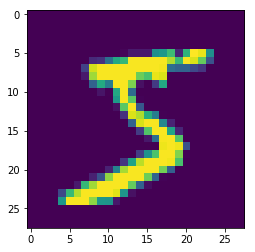